1. Import Libraries

In [1]:
# Import library yang diperlukan
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


2. Load Dataset

In [2]:
# Memuat dataset digits
digits = load_digits()

# Fitur dan label
X = digits.data  # Data fitur (gambar dalam bentuk vektor 64 dimensi)
y = digits.target  # Label kelas (angka 0-9)

# Menampilkan informasi dataset
print(f"Dimensi data (X): {X.shape}")
print(f"Dimensi label (y): {y.shape}")
print("Label unik:", np.unique(y))


Dimensi data (X): (1797, 64)
Dimensi label (y): (1797,)
Label unik: [0 1 2 3 4 5 6 7 8 9]


3. Exploratory Data Analysis (EDA)

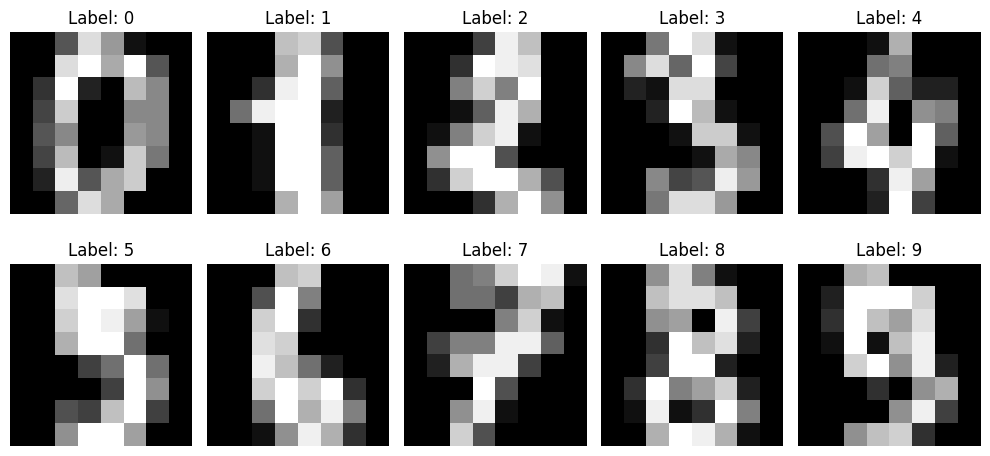

In [3]:
# Visualisasi 10 gambar pertama dari dataset
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


<ipython-input-4-877ff9336091>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


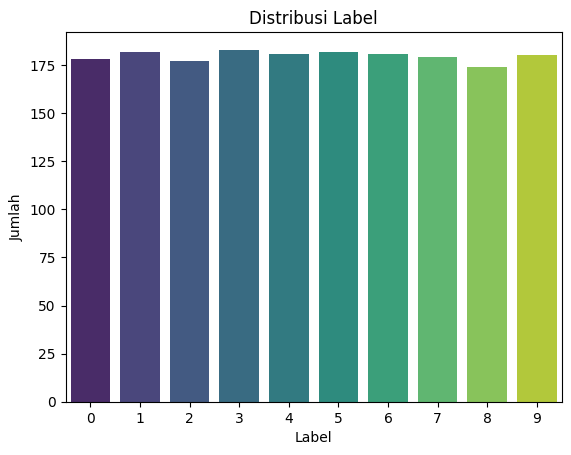

In [4]:
# Visualisasi distribusi label
sns.countplot(x=y, palette='viridis')
plt.title("Distribusi Label")
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.show()


4. Split Data dan Scaling Fitur

In [5]:
# Membagi dataset menjadi data training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [6]:
# Scaling fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


5. Predict & Evaluation

Melatih Model dengan SVM

In [7]:
# Inisialisasi dan melatih model SVM
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Memprediksi data testing
y_pred = model.predict(X_test)


Evaluasi Model

In [8]:
# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Akurasi Model: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.94      0.93        36
           2       1.00      1.00      1.00        35
           3       0.97      0.97      0.97        37
           4       1.00      1.00      1.00        36
           5       1.00      0.97      0.99        37
           6       1.00      1.00      1.00        36
           7       0.95      1.00      0.97        36
           8       0.97      0.89      0.93        35
           9       0.95      0.97      0.96        36

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360


Confusion Matrix:
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  1]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  1]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  1

6. Visualisasi

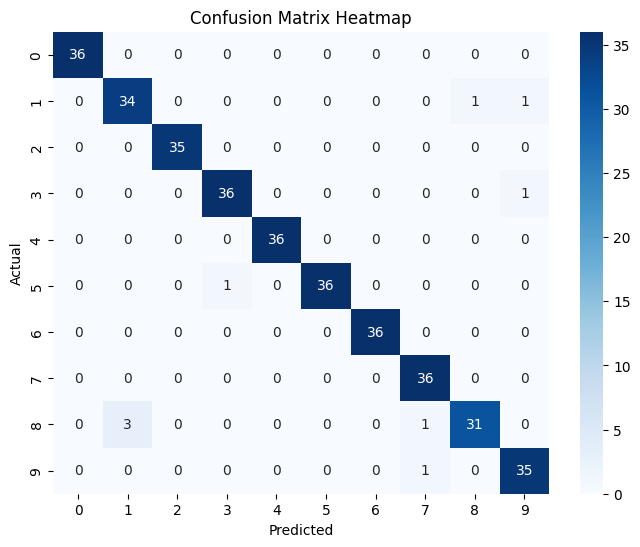

In [9]:
# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


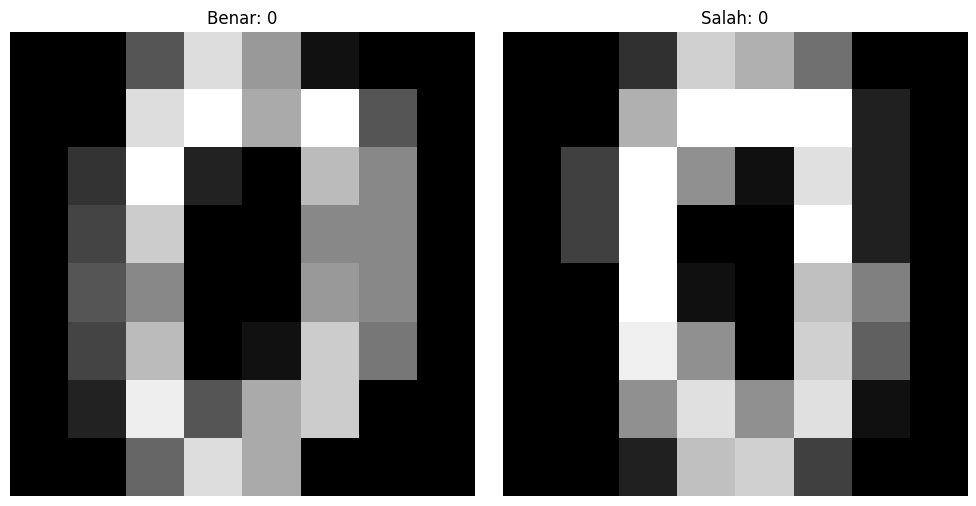

In [10]:
# Menampilkan prediksi yang benar dan salah
plt.figure(figsize=(10, 5))

# Gambar prediksi benar
plt.subplot(1, 2, 1)
plt.imshow(digits.images[0], cmap='gray')
plt.title(f"Benar: {digits.target[0]}")
plt.axis('off')

# Gambar prediksi salah
plt.subplot(1, 2, 2)
plt.imshow(digits.images[20], cmap='gray')
plt.title(f"Salah: {digits.target[20]}")
plt.axis('off')

plt.tight_layout()
plt.show()
